In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
file_path = '/content/drive/MyDrive/Customer segmentation dataset/online_retail_II.xlsx'
df = pd.read_excel(file_path)

In [7]:
print(df.head())
print(df.info())
print(df.describe())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invo

In [8]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [9]:
df = df.dropna(subset=['Customer ID'])

In [10]:
df['Description'] = df['Description'].fillna('unknown')

In [11]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [12]:
df= df.drop_duplicates()

In [13]:
#fix negative value(outliers)
df = df[(df['Quantity'] > 0) &(df['Price'] > 0)]

In [14]:
# fix data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Customer ID'] = df['Customer ID'].astype(int)

In [15]:
# feature engineering
df['Total Price']= df['Quantity']*df['Price']

In [16]:
df['Month']= df['InvoiceDate'].dt.month
df['DayOfWeek']= df['InvoiceDate'].dt.day_name()

In [17]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  int64         
 7   Country      400916 non-null  object        
 8   Total Price  400916 non-null  float64       
 9   Month        400916 non-null  int32         
 10  DayOfWeek    400916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 35.2+ MB


,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
Total Price,0
Month,0


EDA


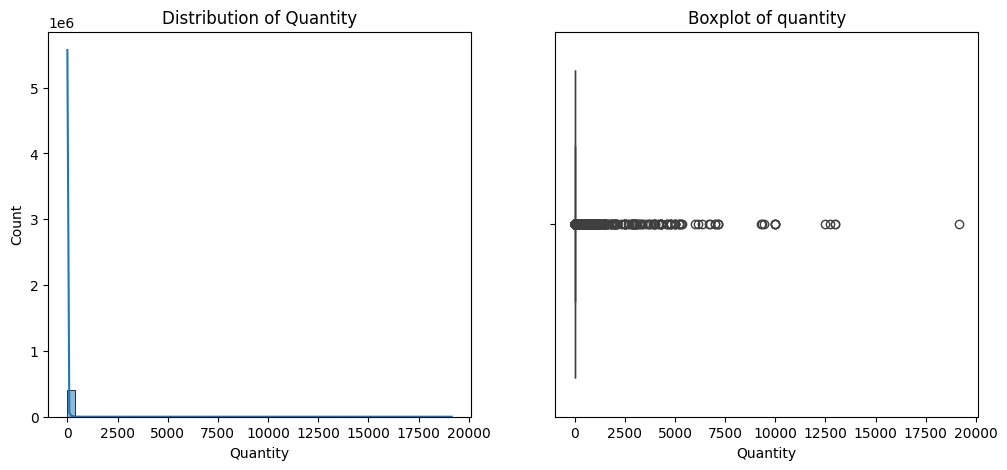

In [18]:
#Understand Sales Quantity and Price Distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.subplot(1,2,2)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of quantity')
plt.show()




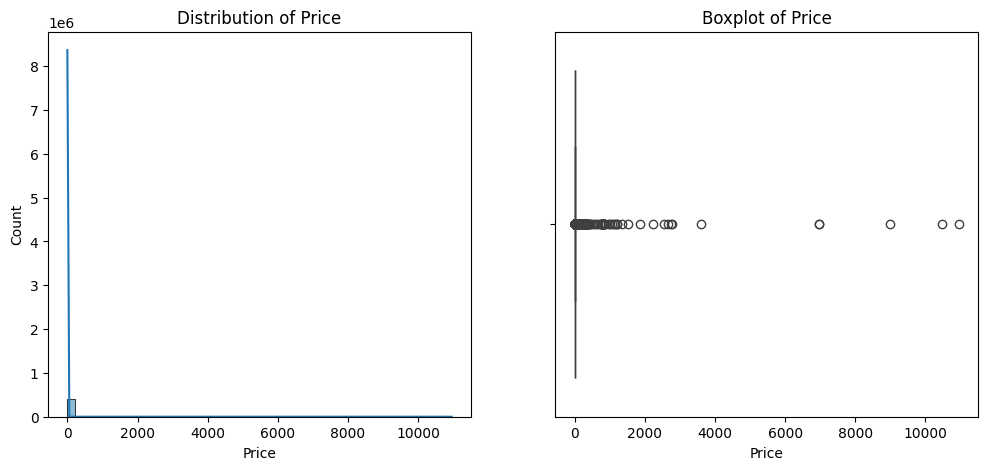

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.subplot(1,2,2)
sns.boxplot(x=df['Price'])
plt.title('Boxplot of Price')
plt.show()




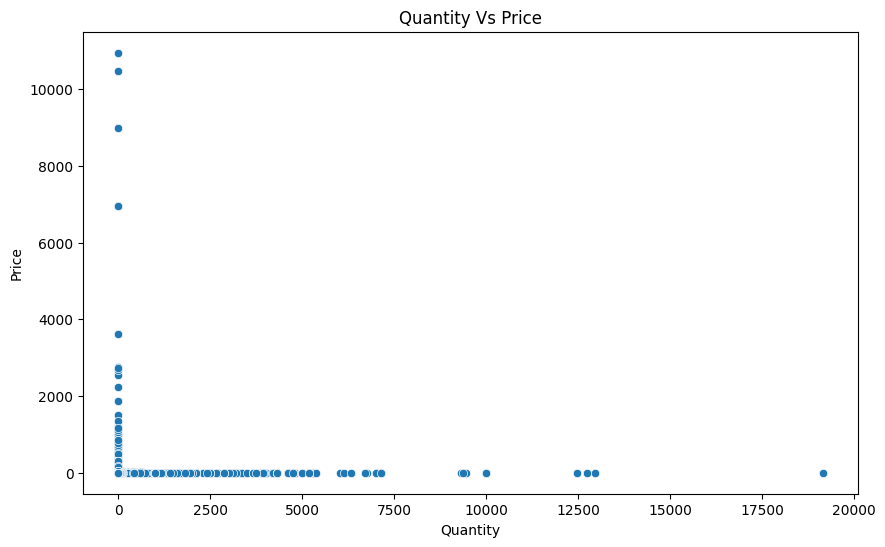

In [20]:
#Relationship Between Quantity and Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='Quantity', y='Price', data=df)
plt.title('Quantity Vs Price')
plt.show()

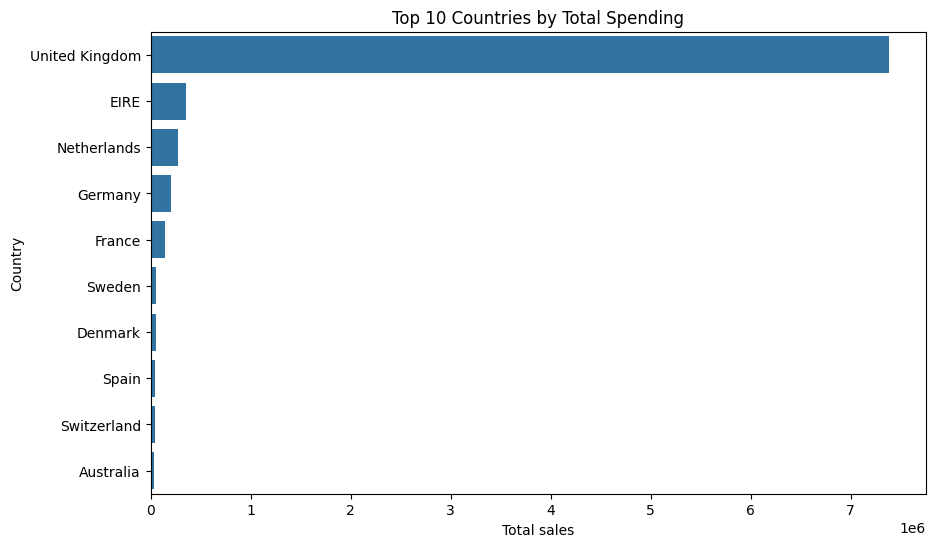

In [21]:
#Spending per Country
country_sales = df.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index, orient='h')
plt.title('Top 10 Countries by Total Spending')
plt.xlabel('Total sales')
plt.ylabel('Country')
plt.show()


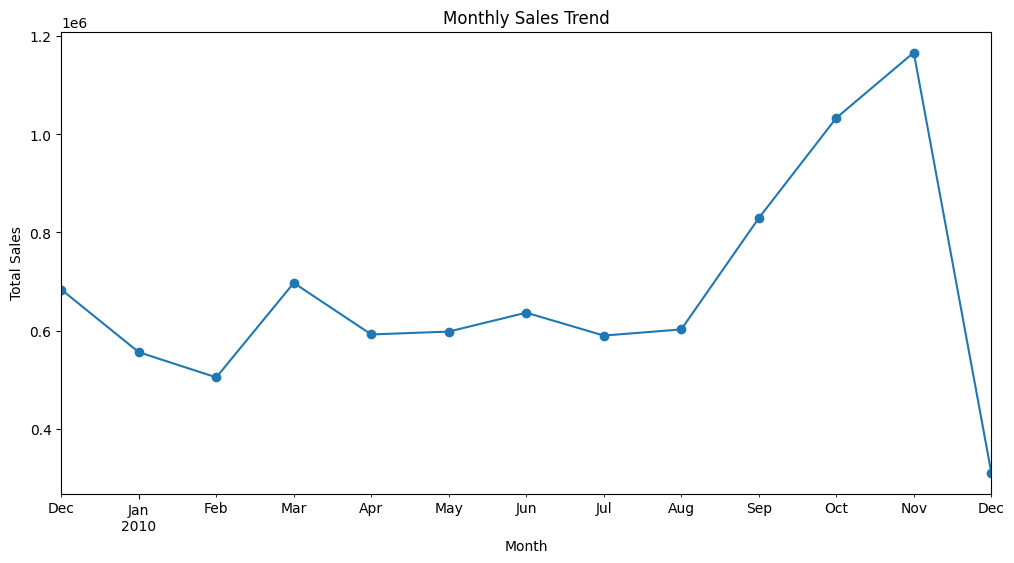

In [22]:
#how sales change over months or weeks
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['Total Price'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


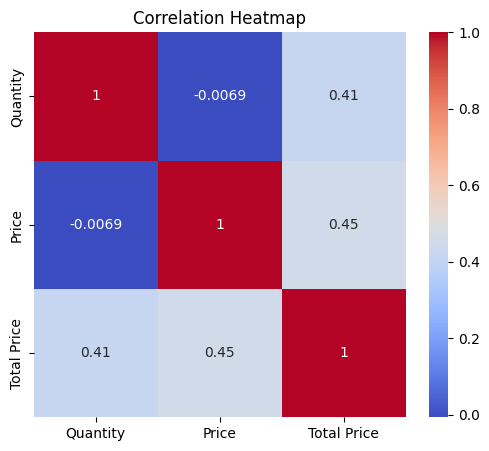

In [23]:
#Correlation Between Features(To see if features (quantity, price, total price) move together)
plt.figure(figsize=(6,5))
sns.heatmap(df[['Quantity', 'Price', 'Total Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [24]:
# handle outliers
import pandas as pd
print(df['Total Price'].describe())
## Cap TotalPrice at 1st and 99th percentiles
lower_cap = df['Total Price'].quantile(0.01)
upper_cap = df['Total Price'].quantile(0.99)
df['Total Price'] = df['Total Price'].apply(lambda x: upper_cap if x > upper_cap else (lower_cap if x < lower_cap else x))
print(df['Total Price'].describe())


count    400916.000000
mean         21.945330
std          77.758075
min           0.001000
25%           5.000000
50%          12.500000
75%          19.500000
max       15818.400000
Name: Total Price, dtype: float64
count    400916.000000
mean         19.221678
std          29.308873
min           0.650000
25%           5.000000
50%          12.500000
75%          19.500000
max         202.755000
Name: Total Price, dtype: float64


In [25]:
#compute RFM (Recency, Frequency, Monetary)
# Snapshot date: one day after the last invoice date
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'Total Price': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm.head())
print(rfm.describe())



   CustomerID  Recency  Frequency  Monetary
0       12346      165         11   372.860
1       12347        3          2  1323.320
2       12348       74          1   222.160
3       12349       43          3  2623.895
4       12351       11          1   300.930
         CustomerID      Recency    Frequency       Monetary
count   4312.000000  4312.000000  4312.000000    4312.000000
mean   15349.290353    91.171846     4.455705    1787.170281
std     1701.200176    96.860633     8.170213    5848.389829
min    12346.000000     1.000000     1.000000       2.950000
25%    13882.500000    18.000000     1.000000     302.728750
50%    15350.500000    53.000000     2.000000     681.810000
75%    16834.250000   136.000000     5.000000    1662.495000
max    18287.000000   374.000000   205.000000  189564.275000


In [26]:
# scaling rmf values
from sklearn.preprocessing import StandardScaler
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)



In [27]:
from sklearn.cluster import KMeans

# Decide number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit K-Means on scaled RFM data
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


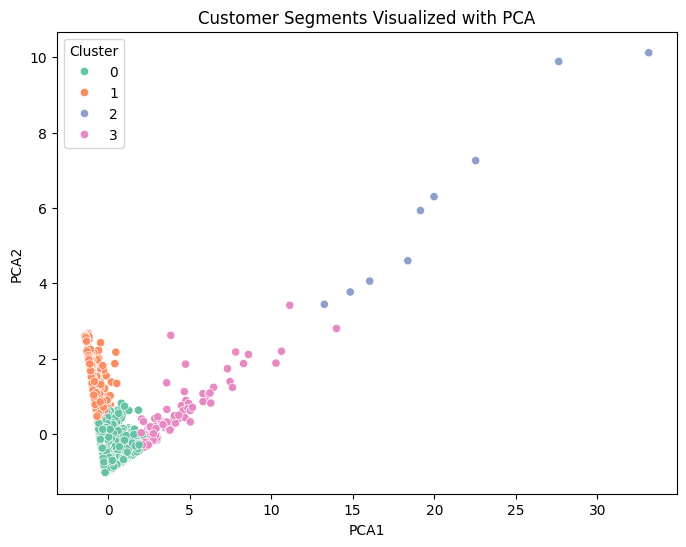

In [28]:
from sklearn.decomposition import PCA

# Apply PCA to reduce RFM scaled data to 2 dimensions
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)

# Add PCA components to RFM dataframe for visualization
rfm['PCA1'] = rfm_pca[:,0]
rfm['PCA2'] = rfm_pca[:,1]

# Plot clusters using PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments Visualized with PCA')
plt.show()


In [29]:
rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).round(1)


,Recency,Frequency,Monetary,CustomerID
Cluster,,,,
0,43.6,4.1,1483.2,3149
1,243.2,1.7,506.8,1045
2,4.9,115.4,99394.0,9
3,14.5,31.1,14784.7,109


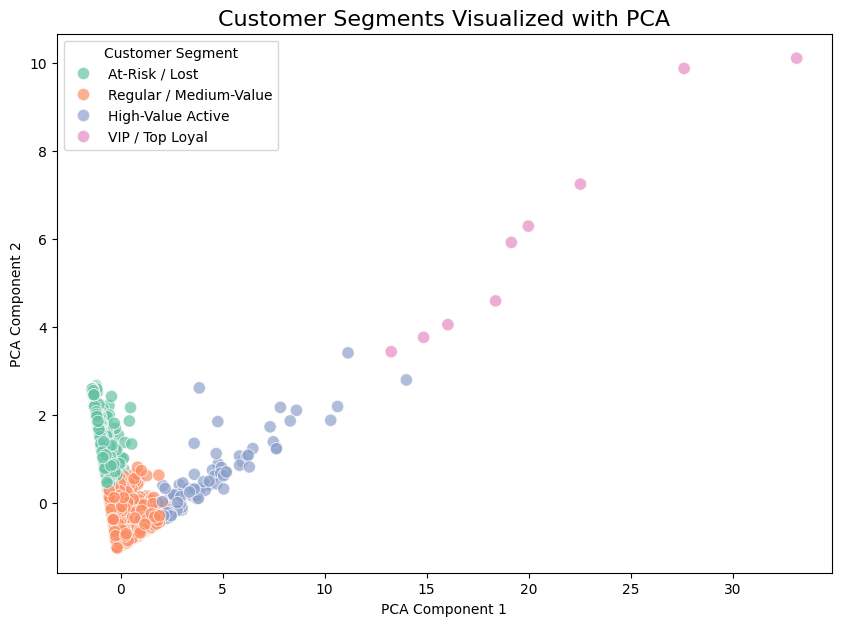

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map clusters to meaningful labels
cluster_labels = {
    0: 'Regular / Medium-Value',
    1: 'At-Risk / Lost',
    2: 'VIP / Top Loyal',
    3: 'High-Value Active'
}

rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)

# Plot PCA components with cluster labels
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=rfm,
    x='PCA1',
    y='PCA2',
    hue='Cluster_Label',
    palette='Set2',
    s=80,  # size of points
    alpha=0.7  # transparency
)
plt.title('Customer Segments Visualized with PCA', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Customer Segment')
plt.show()


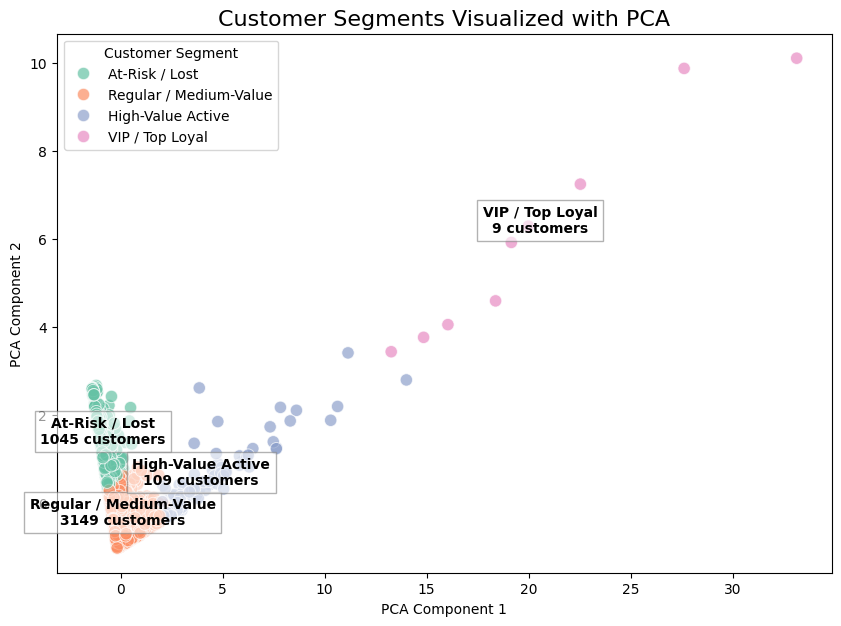

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map clusters to meaningful labels
cluster_labels = {
    0: 'Regular / Medium-Value',
    1: 'At-Risk / Lost',
    2: 'VIP / Top Loyal',
    3: 'High-Value Active'
}
rfm['Cluster_Label'] = rfm['Cluster'].map(cluster_labels)

# Count customers per cluster for annotation
cluster_counts = rfm['Cluster_Label'].value_counts()

# Plot PCA components with cluster labels
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=rfm,
    x='PCA1',
    y='PCA2',
    hue='Cluster_Label',
    palette='Set2',
    s=80,
    alpha=0.7
)

# Annotate each cluster with customer count
for label, count in cluster_counts.items():
    # Get mean PCA1, PCA2 coordinates for the cluster
    x = rfm[rfm['Cluster_Label'] == label]['PCA1'].mean()
    y = rfm[rfm['Cluster_Label'] == label]['PCA2'].mean()
    plt.text(x, y, f"{label}\n{count} customers",
             horizontalalignment='center',
             weight='bold',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray'))

plt.title('Customer Segments Visualized with PCA', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Customer Segment')
plt.show()


In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Assuming rfm_scaled is your scaled RFM data and kmeans is your trained model
score = silhouette_score(rfm_scaled, kmeans.labels_)
print("Silhouette Score:", score)
# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(rfm_scaled, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_score)

# Davies-Bouldin Index
db_score = davies_bouldin_score(rfm_scaled, kmeans.labels_)
print("Davies-Bouldin Index:", db_score)

# Inertia (WCSS)
inertia = kmeans.inertia_
print("Inertia (WCSS):", inertia)


Silhouette Score: 0.608531896981526
Calinski-Harabasz Index: 3912.4784880867837
Davies-Bouldin Index: 0.6277202973151116
Inertia (WCSS): 3473.155223747537


Average Silhouette Score: 0.625


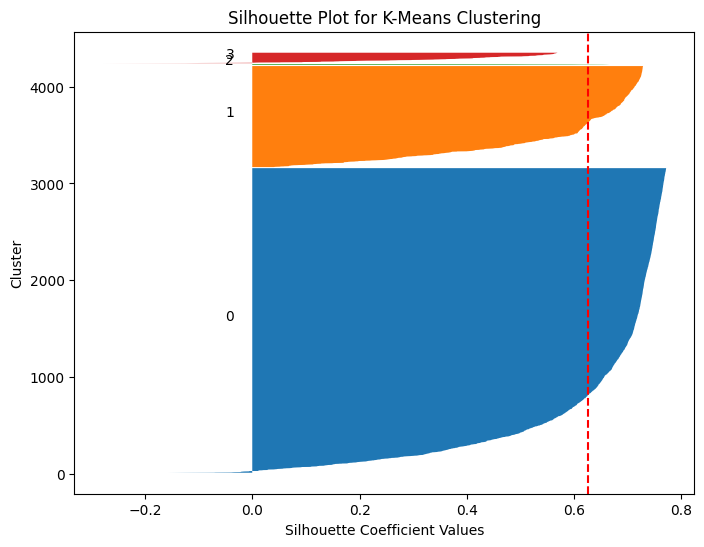

In [35]:
import numpy as np

# Use your PCA components as input data
X_pca = rfm[['PCA1', 'PCA2']].values

# Your cluster labels
labels = rfm['Cluster']

# Now run the silhouette plot code again
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Compute silhouette scores
silhouette_vals = silhouette_samples(X_pca, labels)
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Average Silhouette Score: {silhouette_avg:.3f}")

# Number of clusters
n_clusters = len(np.unique(labels))
y_lower = 10

# Plot silhouette diagram
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette Plot for K-Means Clustering")
plt.show()


K=2, Silhouette Score=0.5525
K=3, Silhouette Score=0.5771
K=4, Silhouette Score=0.6085
K=5, Silhouette Score=0.4553
K=6, Silhouette Score=0.4944
K=7, Silhouette Score=0.3833
K=8, Silhouette Score=0.3891
K=9, Silhouette Score=0.4103
K=10, Silhouette Score=0.3897


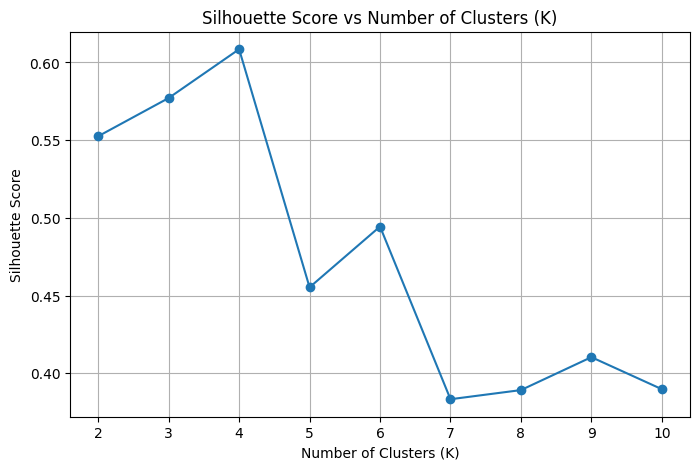

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Try different K values
K_values = range(2, 11)
silhouette_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)  # use your scaled RFM data
    labels = kmeans.labels_
    score = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


terpretation

The Silhouette Score measures how well each point fits within its cluster compared to other clusters.

Range: –1 → +1

Closer to +1 → better-defined clusters

Around 0 → clusters overlap

Negative → misclassified data points

👉  best score (0.6085) happens at K = 4,
so 4 clusters is the optimal number — confirming what we already found visually in your PCA scatter plot

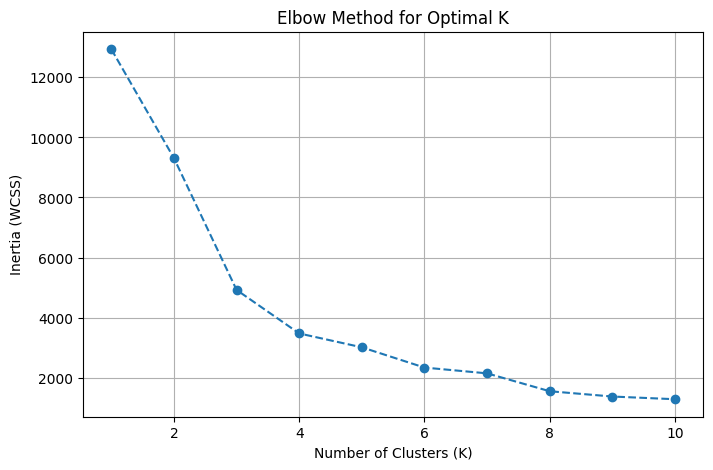

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try K from 1 to 10
inertia_values = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)  # using your scaled RFM data
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_values, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.show()


Silhouette Score highest at K=4

Elbow curve likely bends at K=4

👉 So, K=4 is the best number of clusters — confirming both evaluation metrics agree.